# Types of Trends

## Introduction

Often, basic regression techniques are not sufficient to grasp the more complex, time-dependent patterns that are common when dealing with time series data. Using time series analysis techniques, the purpose is to get more insight in your data on one hand, and to make predictions on the other hand. First, we'll introduce the types of trends that exist in time series models and have a look at them.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Stationarity

A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time. 

Why is it important? Because most time series models work on the assumption that **the time series are stationary**. For general time series datasets, if it shows a particular behaviour over time, there is a very high probability that it will follow a similar behaviour in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Although stationarity is defined using very strict criteria, for practical purposes we can assume the series to be stationary if it has following constant statistical properties over time:

> * **The mean of the series should not be a function of time rather should be a constant. The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.**

![](Mean_nonstationary.png)

> * **The variance of the series should not a be a function of time. This property is known as homoscedasticity. Following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph)**

![](Var_nonstationary.png)
> * **The covariance of the i th term and the (i + m) th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’ below.**

![](Cov_nonstationary.png)

## Types of trends: overview

WHen time series models are not stationary, we say there is a **trend**. Let's have a look at a few examples of trends that can be observed in time series models.

### No trend

Let's consider our the monthly returns for the NYSE from January 1961 through December 1966 again. You'll notice that the monthly return goes up and down, but there is no clear direction, and over time, the index oscillates around 0. We say that this particular time series has *no trend*. 

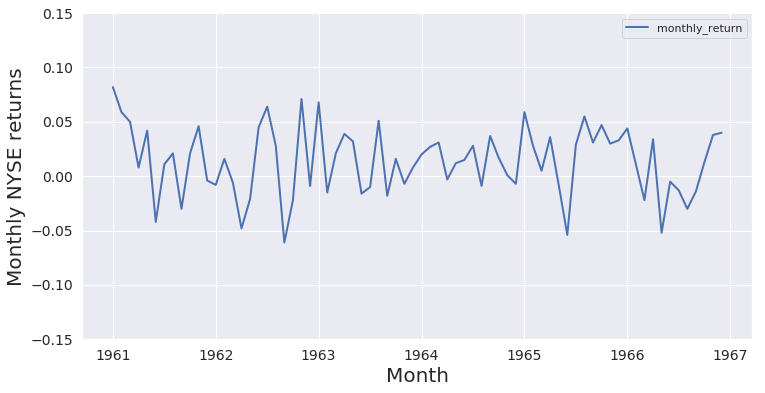

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

data = pd.read_csv("NYSE_monthly.csv")
col_name = 'Month'
data[col_name] = pd.to_datetime(data[col_name])
data.set_index(col_name, inplace=True)
data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel(col_name, fontsize=20)
plt.ylabel("Monthly NYSE returns", fontsize=20)
plt.ylim((-0.15,0.15));

In [3]:
data.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


### Linear trend

#### Upward linear

In many cases, there will be some sort of trend, however. A common trend type is a linear trend, where the observation grows bigger over time, or declines. Examples given here are the quarterly U.K. importes of goods and services over time. A second example is a record of the winning times for the men's 400 m final at the olympics. Note how the winning time has gone down over the years!

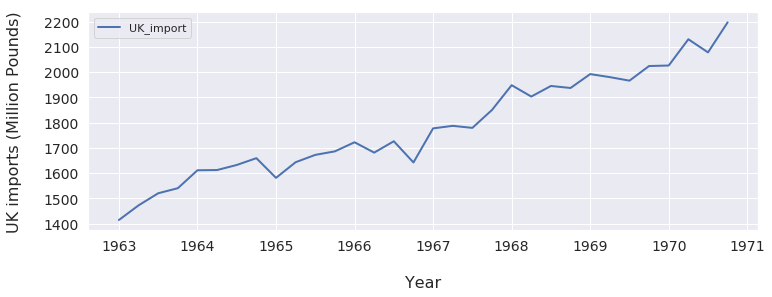

In [6]:
data = pd.read_csv("uk_imports.csv")
data.Quarter = pd.to_datetime(data.Quarter)
data.set_index('Quarter', inplace=True)

data.plot(figsize=(12,4), linewidth=2, fontsize=14)
plt.ylabel('UK imports (Million Pounds)\n', fontsize=16)
plt.xlabel('\nYear', fontsize=16);

#### Downward linear

Winning times for the men's 400 m final in each Olympic Games from 1896 to 1996.

In [7]:
data = pd.read_csv("winning_400m.csv")
data.year = data.year.astype(str)
data.year = pd.to_datetime(data.year.astype(str))

col_name= 'year'
data.set_index(col_name, inplace=True)

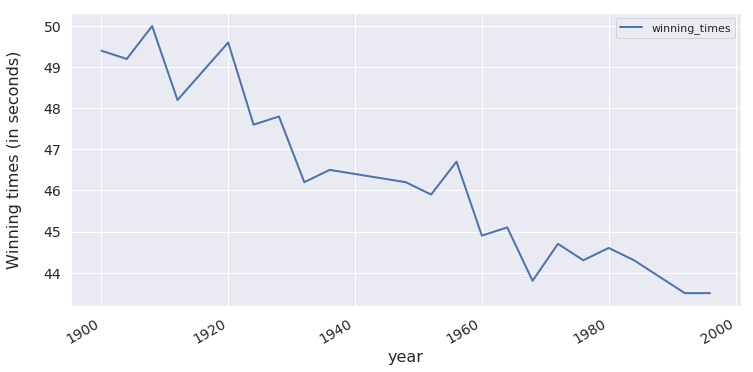

In [8]:
data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel(col_name, fontsize=16)
plt.ylabel("Winning times (in seconds)\n", fontsize=16);

### Exponential trend

Another type of trend that can be observed is an exponential trend. A typical example could be a company's sales. As small companies start to grow sales could be slower, when their product catches people's attention the sales can start to grow exponentially. A simulated example can be found below.

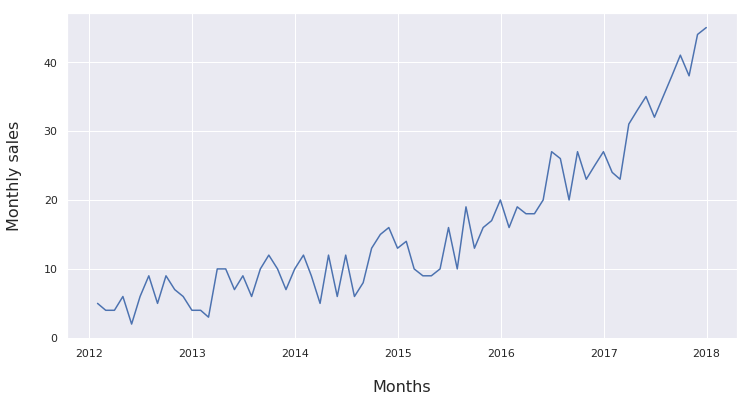

In [10]:
# generated data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel("\nMonths", fontsize=16)
plt.ylabel("Monthly sales\n", fontsize=16)
plt.show()

### Periodic Trend

Trends can obviously go up and down again as well. In many applications, what will happen is that trends are periodic. Think about temperature trends: while temperature will go up in summer, it will go down again in winter, and we can expect to see a cyclical pattern. The Australian minimum temperature data set shows the result below.

In [11]:
data = pd.read_csv("min_temp.csv")
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)

data.head()

,Daily_min
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


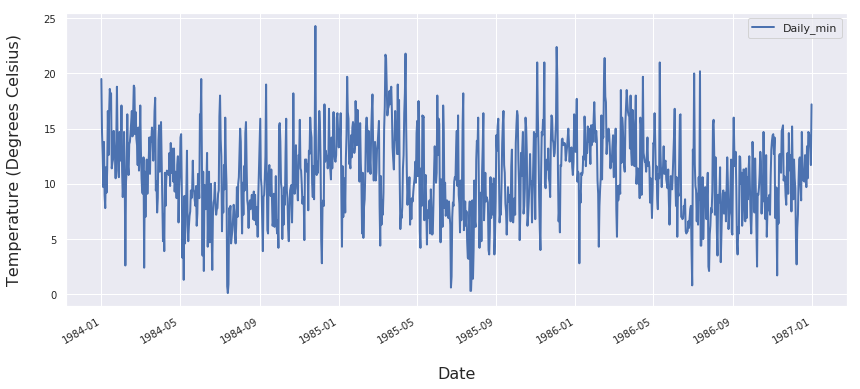

In [13]:
data_slice= data['1984':'1986']
data_slice.plot(figsize=(14,6), linewidth=2, fontsize=10)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Temperature (Degrees Celsius)\n', fontsize=16);

### Trend with an increasing variance

In the previous trend types, the variability remained constant over time. But in some cases, this might not be the case, and variability can change over time. A simulated example is shown in the plot below.

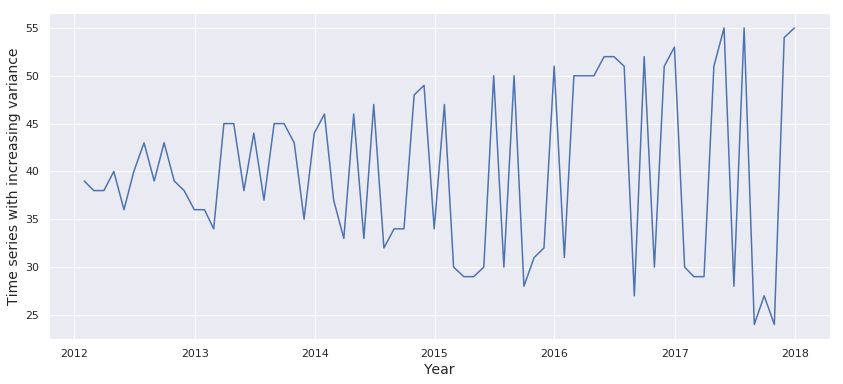

In [14]:
# generated data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)

add = np.where(sales>0, 1, -1)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,
                   3,3,3,3,4,4,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,8,8,
                   9,9,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,12,12])
data = pd.Series((sales+add*bigger)+40, index=index)

fig = plt.figure(figsize=(14,6))
plt.plot(data)
plt.ylabel("Time series with increasing variance", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

### Periodic and upward trend

Obviously, several types of trends can also occur together in time series data. This plane passenger data between July '62 and May '72 shows that while there may be a periodic (seasonal) trend, there is also an upward trend over time.

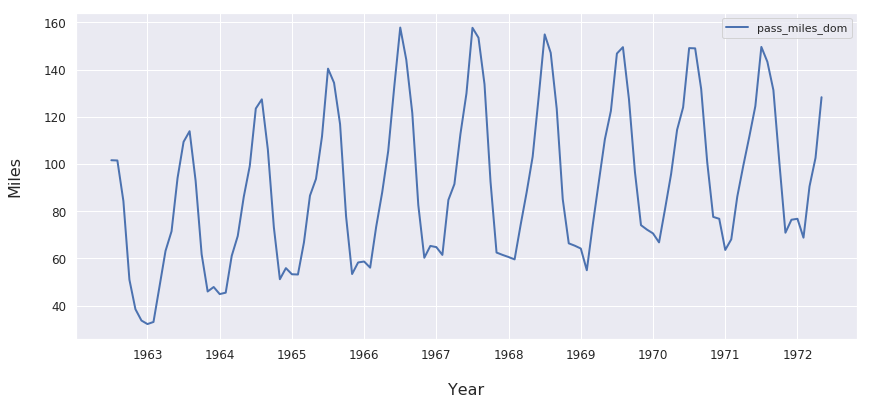

In [16]:
air = pd.read_csv("airpassengers.csv")
air.Month = pd.to_datetime(air.Month)
air.set_index('Month', inplace=True)
air.head()

air.plot(figsize=(14,6), linewidth=2, fontsize=12)
plt.xlabel('\nYear', fontsize=16)
plt.ylabel('Miles\n', fontsize=16);

## Testing for trends

Let's look at our generated monthly sales data again with exponential trends. From simply inspecting the data, it is already pretty clear that there is a certain trend.

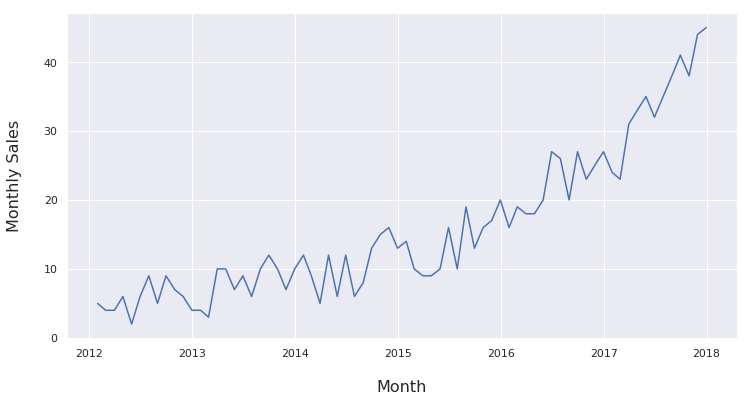

In [17]:
# generated data 
years = pd.date_range('2012-01', periods=72, freq="M")
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts=data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel("\nMonth", fontsize=16)
plt.ylabel("Monthly Sales\n", fontsize=16)
plt.show()

 In what follows, we'll discuss two formal ways to assess trends:
- Rolling statistics
- The Dickey-Fuller Test

### Rolling statistics

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean **at any point in time $t$, we can take the average/variance of the, let's say, $m$ last time periods. $m$ is then known as the window size**. 

Pandas has a built in function called [rolling()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html), which can be called along with `.mean()` and `.std()` to calculate these rolling statistics. Let's take a window size of 8 for this example.

In [18]:
rolmean = ts.rolling(window = 8, center = False).mean()
rolstd = ts.rolling(window = 8, center = False).std()

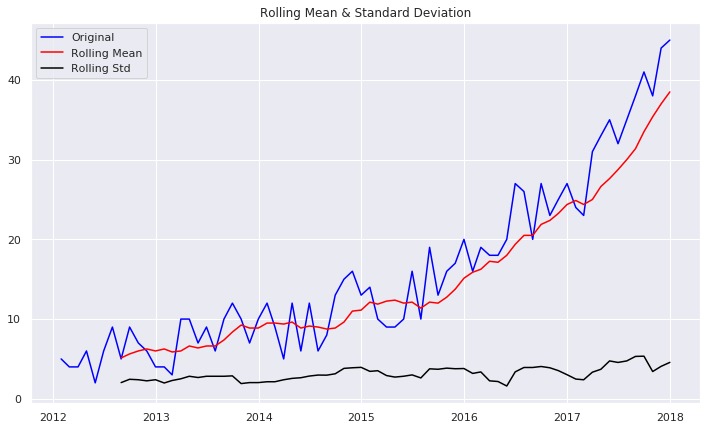

In [19]:
fig = plt.figure(figsize=(12,7))
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The red and black lines represent the rolling mean and rolling standard deviations. You can clearly see that the mean is not constant over time, so we can reconfirm our conclusion that the time series are not stationary based on rolling mean and rolling standard error. 

### The Dickey Fuller Test

The Dickey Fuller Test is a statistical test for testing stationarity. The Null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null
hypothesis and say that the series is stationary. The Dickey Fuller test is available in stattools from the StatsModels module. More details on this can be viewed [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

In [21]:
from statsmodels.tsa.stattools import adfuller
from pandas import tseries

dftest = adfuller(ts)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(3.761375741674094, 1.0, 8, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 314.84474355172597)


A nice print-out of the Dickey Fuller test can be found below.
The p-value is 1 here, so the time series are clearly not stationary!

In [22]:
print ('Results of Dickey-Fuller Test:')

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  3.761376
p-value                         1.000000
#Lags Used                      8.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


## Additional materials

A great overview of how to test for time series stationarity can be found [here](https://machinelearningmastery.com/time-series-data-stationary-python/).

## Summary

In this lab, you learned how to check for the stationarity of a time series object in python. You used rolling statistics, with rolling mean and rolling standrad deviation to check for trends and seasonal elements in a time series, and how to use Dickey Fuller test to run statistical test on a time series and check for its stationarity with a significance level.